In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from graspy.align import SeedlessProcrustes, SignFlips
from graspy.inference import LatentDistributionTest
from graspy.embed import AdjacencySpectralEmbed
from graspy.simulations import sbm

In [2]:
mc_iters = 1000

In [3]:
signs_p_vals = np.zeros(mc_iters)
for i in tqdm(range(mc_iters)):
    n_1 = np.random.binomial(100, 0.5)
    n_2 = np.random.binomial(100, 0.5)
    ns_1 = [n_1, 100-n_1]
    ns_2 = [n_2, 100-n_2]
    P = [[0.9, 0.1], [0.1, 0.9]]
    A = sbm(ns_1, P)
    B = sbm(ns_2, P)
    ldt = LatentDistributionTest(test="hsic", 
                                metric="gaussian",
                                align_type="sign_flips",
                                n_components=2,
                                workers=4)
    signs_p_vals[i] = ldt.fit_predict(A, B)

In [4]:
seedless_p_vals = np.zeros(mc_iters)
for i in tqdm(range(mc_iters)):
    n_1 = np.random.binomial(100, 0.5)
    n_2 = np.random.binomial(100, 0.5)
    ns_1 = [n_1, 100-n_1]
    ns_2 = [n_2, 100-n_2]
    P = [[0.9, 0.1], [0.1, 0.9]]
    A = sbm(ns_1, P)
    B = sbm(ns_2, P)
    ldt = LatentDistributionTest(test="hsic", 
                                metric="gaussian",
                                align_type="seedless_procrustes",
                                n_components=2,
                                workers=4)
    seedless_p_vals[i] = ldt.fit_predict(A, B)

In [5]:
# not valid with only sign flips
(signs_p_vals < 0.05).mean(), (seedless_p_vals < 0.05).mean(), 

(0.466, 0.034)

(-1.0, 1.0)

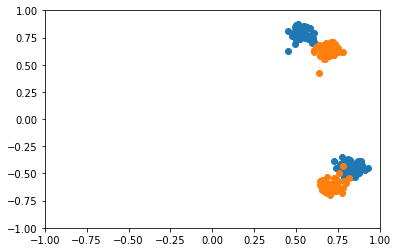

In [6]:
n_1 = np.random.binomial(100, 0.5)
n_2 = np.random.binomial(100, 0.5)
ns_1 = [n_1, 100-n_1]
ns_2 = [n_2, 100-n_2]
P = [[0.9, 0.1], [0.1, 0.9]]
A = sbm(ns_1, P)
B = sbm(ns_2, P)
ase = AdjacencySpectralEmbed(n_components=2)
X = ase.fit_transform(A)
Y = ase.fit_transform(B)
plt.scatter(X[:,0], X[:,1])
plt.scatter(Y[:,0], Y[:,1])
plt.xlim(-1, 1)
plt.ylim(-1, 1)

(-1.0, 1.0)

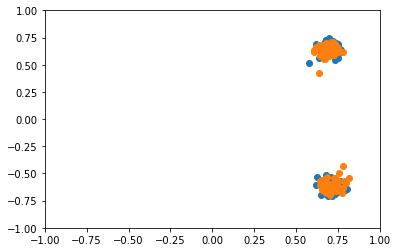

In [7]:
X_prime, Y_prime = SeedlessProcrustes().fit_transform(X, Y)
plt.scatter(X_prime[:,0], X_prime[:,1])
plt.scatter(Y_prime[:,0], Y_prime[:,1])
plt.xlim(-1, 1)
plt.ylim(-1, 1)

(-1.0, 1.0)

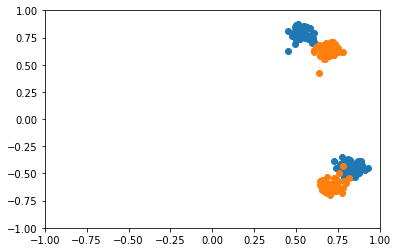

In [8]:
X_prime, Y_prime = SignFlips().fit_transform(X, Y)
plt.scatter(X_prime[:,0], X_prime[:,1])
plt.scatter(Y_prime[:,0], Y_prime[:,1])
plt.xlim(-1, 1)
plt.ylim(-1, 1)